This notebook provides and introduction to using the RDKit

Import the necessary Python libraries

In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
# A few settings to improve the quality of structures 
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)

Create a molecule (benzene) from a SMILES string

In [3]:
mol = Chem.MolFromSmiles("c1ccccc1")

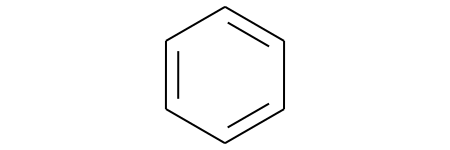

In [4]:
mol

Get SMILES fro Gleevec from ChEMBL

- [From ChEMBL](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL941)

In [5]:
glvc = Chem.MolFromSmiles("CN1CCN(Cc2ccc(cc2)C(=O)Nc3ccc(C)c(Nc4nccc(n4)c5cccnc5)c3)CC1")

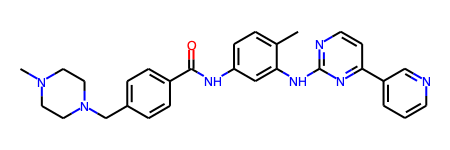

In [6]:
glvc

Read a set of molecules from an SD file

In [8]:
mols = [x for x in Chem.SDMolSupplier("../data/ch05_compounds.sdf")]

In [9]:
mols

Draw these molecules as a grid

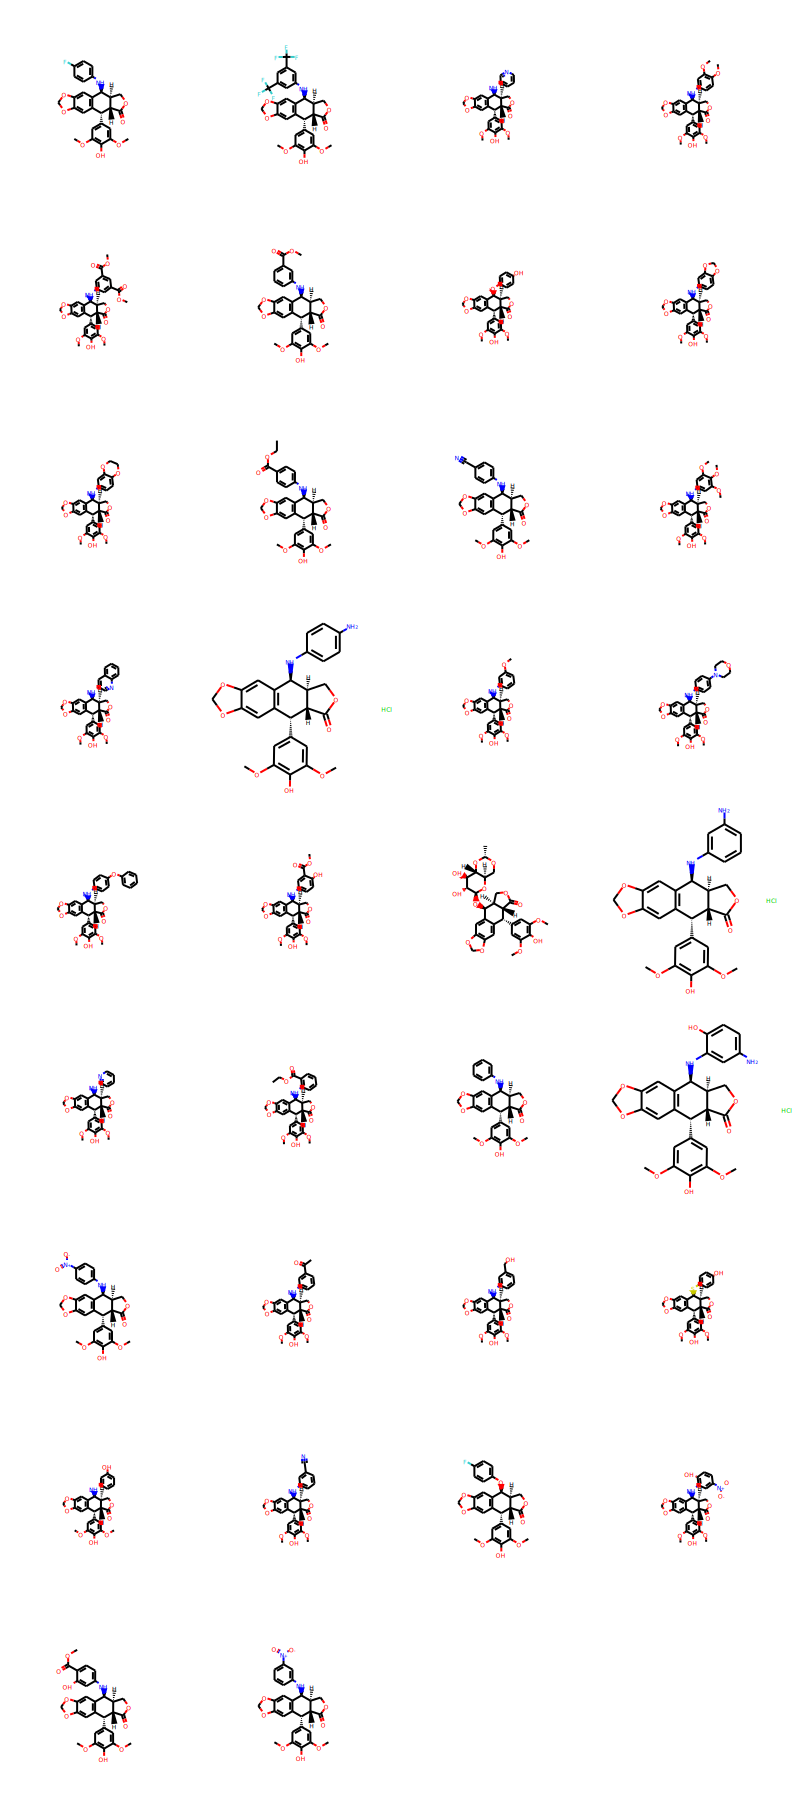

In [11]:
Draw.MolsToGridImage(mols,molsPerRow=4,useSVG=True)

Note that some of the structure above have bond lenghts that are very different than the others.  This makes the grid somewhat unattractive.  We will define a couple of functions to normalize the bond lengths and make the structures look better. 

In [12]:
import numpy as np
from rdkit.Chem.rdmolops import Get3DDistanceMatrix
from rdkit.Chem import AllChem

def get_bond_lengths(mol):
    """
    Return a list of bond lengths 
    :param mol: input molecule
    :return: list of bond lengths
    """
    dm = Get3DDistanceMatrix(mol)
    bnd_list = []
    for bnd in mol.GetBonds():
        start = bnd.GetBeginAtomIdx()
        end = bnd.GetEndAtomIdx()
        bnd_list.append(dm[start,end])
    return bnd_list

def scale_molecule(mol, factor=1.5):
    """
    Scale the bond lengths in a molecule
    :param mol: input molecule
    :param factor: scaling factor
    :return: None
    """
    mean_dist = np.mean(get_bond_lengths(mol))
    factor = factor/mean_dist
    matrix = np.zeros((4, 4), np.float)
    for i in range(3):
        matrix[i, i] = factor
        matrix[3, 3] = 1
    AllChem.TransformMol(mol, matrix)

Now use the functions defined above to scale the molecules. 

In [13]:
res = [scale_molecule(x) for x in mols]

Let's Draw the grid again and see if it looks better. 

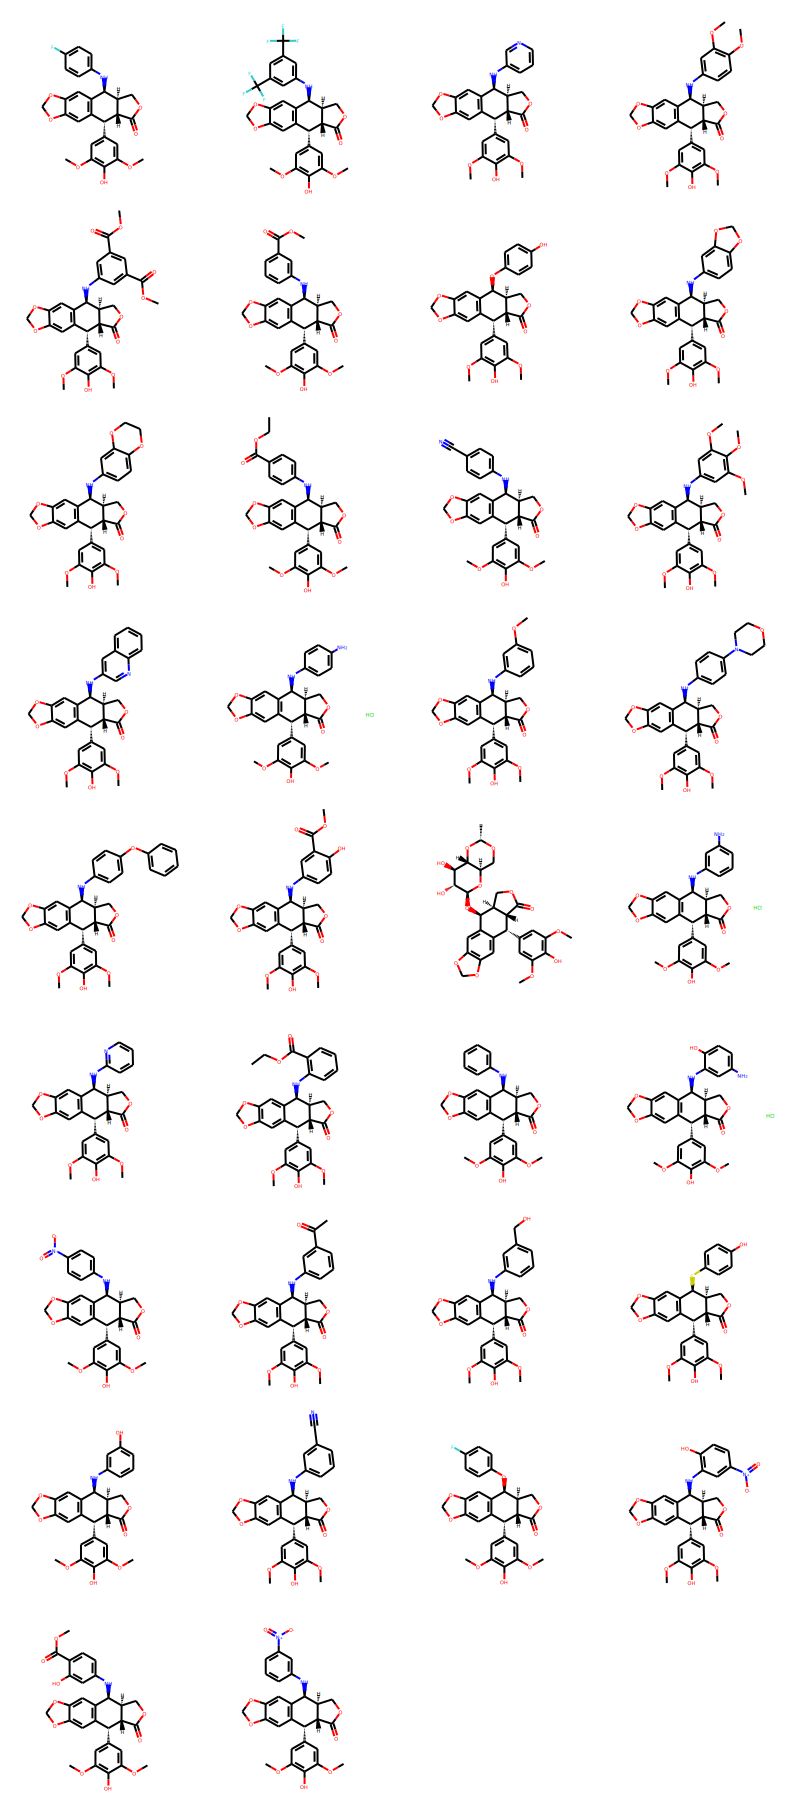

In [14]:
Draw.MolsToGridImage(mols,molsPerRow=4,useSVG=True)

We can also read an SD file into a Pandas dataframe. 

In [16]:
from rdkit.Chem import PandasTools

In [17]:
df = PandasTools.LoadSDF("../data/ch05_compounds.sdf")

,ID,ROMol,chembl_id
0,,,CHEMBL281692
1,,,CHEMBL430726
2,,,CHEMBL281430
3,,,CHEMBL284291
4,,,CHEMBL286088

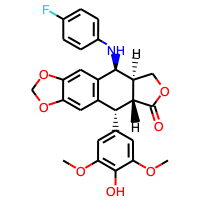
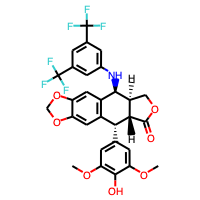
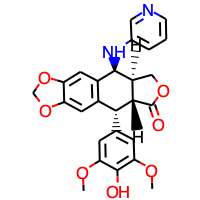
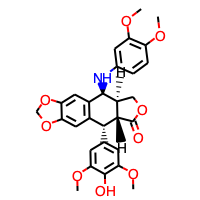
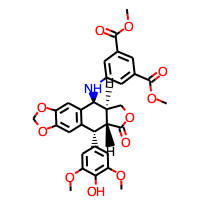

In [18]:
df.head()

Let's add columns with molecular weight and LogP to the dataframe.

In [19]:
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP
df['MW'] = [MolWt(x) for x in df.ROMol]
df['LogP'] = [MolLogP(x) for x in df.ROMol]

,ID,ROMol,chembl_id,MW,LogP
0,,,CHEMBL281692,493.487,4.3651
1,,,CHEMBL430726,611.491,6.2636
2,,,CHEMBL281430,476.485,3.6210
3,,,CHEMBL284291,535.549,4.2432
4,,,CHEMBL286088,591.569,3.7992

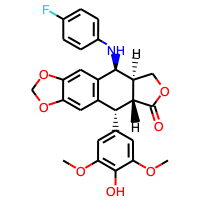
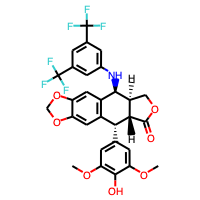
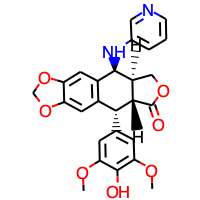
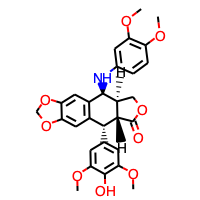
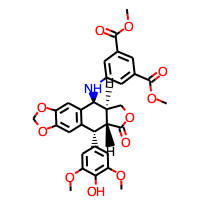

In [21]:
df.head()

We can use a boxplot to examine the distribution of molecular weight within the dataframe. 

In [25]:
import seaborn as sns

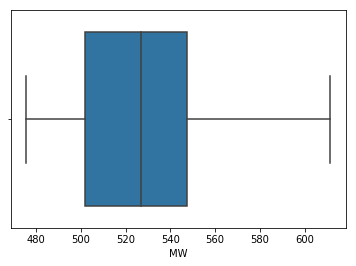

In [27]:
ax = sns.boxplot(df.MW)